<a href="https://colab.research.google.com/github/jeron-williams/food_hub_data_analysis_EDA/blob/main/Food_Hub_Data_Analysis_Full_Code_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

I get the sense that this does not need to be run. I am doing this work in Google Colab.

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Python Foundations Module 1/Food_Hub_Data_Analysis_Full_Code_Project.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python Foundations Module 1/Food_Hub_Data_Analysis_Full_Code_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 899747 bytes to /content/drive/MyDrive/Python Foundations Module 1/Food_Hub_Data_Analysis_Full_Code_Project.html


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Python Foundations Module 1/Food_Hub_Data_Analysis_Full_Code_Project.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
order_data = pd.read_csv('/content/drive/MyDrive/Python Foundations Module 1/foodhub_order.csv')

In [ ]:
# display the first 5 rows of the data
order_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# display the amount of rows and columns
order_data.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Display a concise summary of the DataFrame 'order_data'
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

int64, object, and float64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing (null) values in the DataFrame 'order_data'
null = order_data.isnull().sum()

print(null)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

There are no missing values in the data set

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Generate descriptive statistics for the numerical columns in the 'order_data' DataFrame
order_data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

min = 20.0 min., avg = 27.37 min., max = 35.0 min.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Provide a descritption of all the individual unique values in the ratings column
order_data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

It looks like 736 ratings are not given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

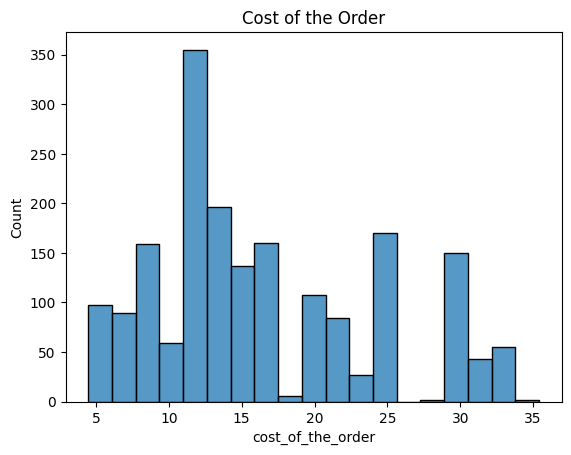

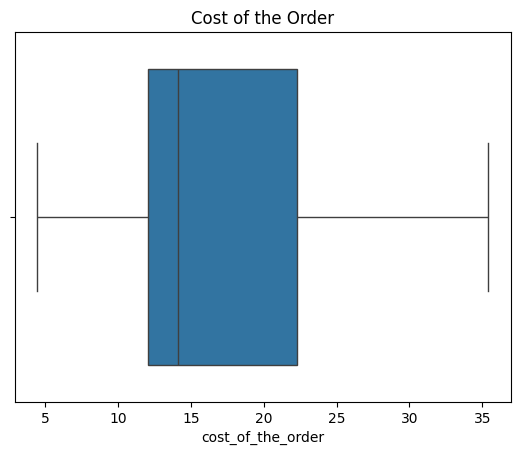

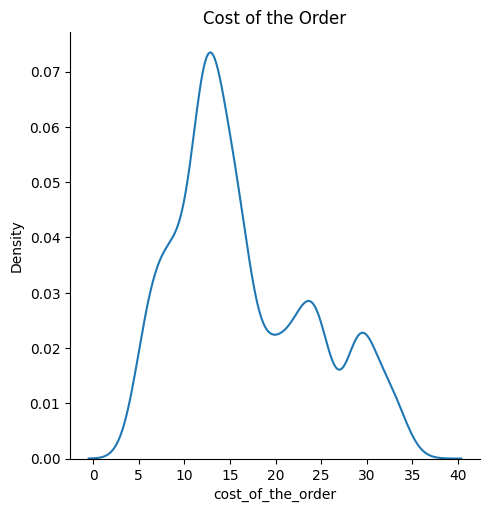

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
35.41
4.47


In [ ]:
# Histogram of 'cost_of_the_order'
# Shows the frequency distribution of the order costs
sns.histplot(data=order_data, x='cost_of_the_order')
plt.title('Cost of the Order')  # Add a title to the histogram
plt.show()  # Display the plot

# Boxplot of 'cost_of_the_order'
# Useful for identifying outliers and visualizing the spread of the data
sns.boxplot(data=order_data, x='cost_of_the_order')
plt.title('Cost of the Order')  # Add a title to the boxplot
plt.show()  # Display the plot

# KDE (Kernel Density Estimate) plot of 'cost_of_the_order'
# Shows the probability density function — a smoothed version of the histogram
sns.displot(data=order_data, x='cost_of_the_order', kind='kde')
plt.title('Cost of the Order')  # Add a title to the KDE plot
plt.show()  # Display the plot

# Get descriptive statistics of the 'cost_of_the_order' column
coo_des = order_data['cost_of_the_order'].describe()

# Count the number of occurrences of each unique order cost
coo_count = order_data['cost_of_the_order'].value_counts()

# Find the maximum order cost
coo_max = order_data['cost_of_the_order'].max()

# Find the minimum order cost
coo_min = order_data['cost_of_the_order'].min()

# Print the summary statistics
print(coo_des)

# Print the maximum cost value
print(coo_max)

# Print the minimum cost value
print(coo_min)


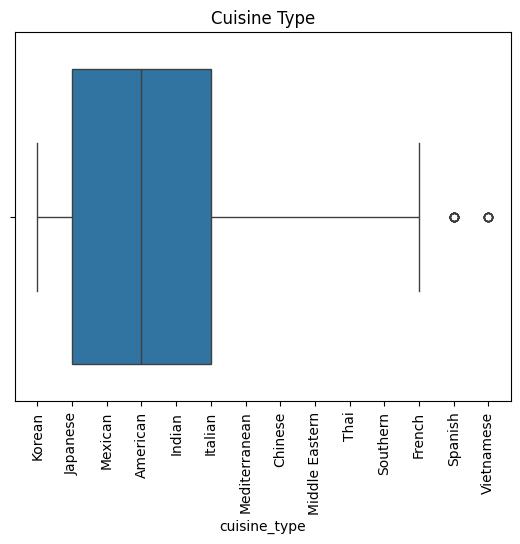

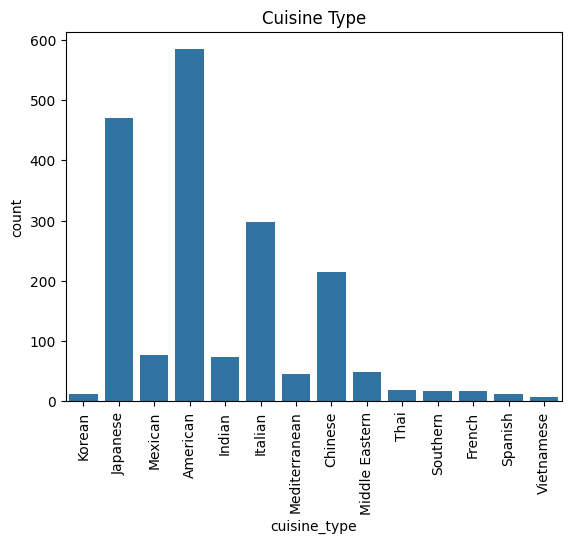

count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


In [ ]:
# Boxplot of 'cuisine_type'
# Although boxplots are typically used for numerical data, this can show distribution if paired with a numerical axis
# (e.g., you might add 'cost_of_the_order' as y to analyze cost by cuisine type)
sns.boxplot(data=order_data, x='cuisine_type')
plt.title('Cuisine Type')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Countplot of 'cuisine_type'
# This shows how many times each cuisine type appears in the dataset (i.e., frequency of categories)
sns.countplot(data=order_data, x='cuisine_type')
plt.title('Cuisine Type')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlapping
plt.show()  # Display the plot

# Get descriptive statistics for the 'cuisine_type' column (categorical)
# Includes count, number of unique values, most frequent value, and its frequency
ct_des = order_data['cuisine_type'].describe()

# Get frequency counts for each unique cuisine type
ct_count = order_data['cuisine_type'].value_counts()

# Print the descriptive statistics
print(ct_des)

# Print the count of each cuisine type
print(ct_count)


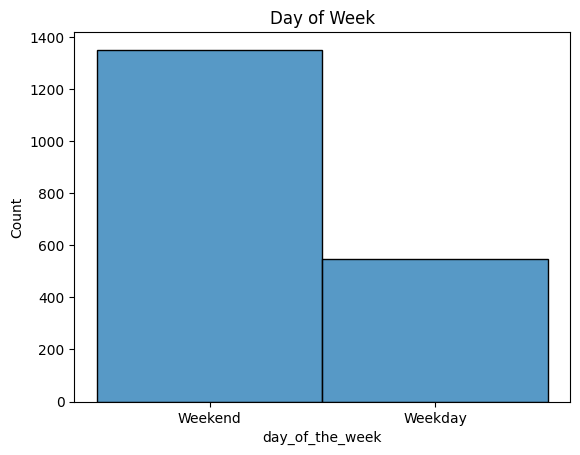

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


In [ ]:
# Plot a histogram of the 'day_of_the_week' column
# Since this is a categorical variable, this functions like a count plot
sns.histplot(data=order_data, x='day_of_the_week')

# Add a title to the plot
plt.title('Day of Week')

# Show the plot
plt.show()

# Generate summary statistics for the 'day_of_the_week' column
# Includes: total count, number of unique days, most frequent day, and its frequency
dow_des = order_data['day_of_the_week'].describe()

# Count the occurrences of each unique day in the dataset
dow_count = order_data['day_of_the_week'].value_counts()

# Print the descriptive statistics for day of the week
print(dow_des)

# Print the count of orders for each day of the week
print(dow_count)


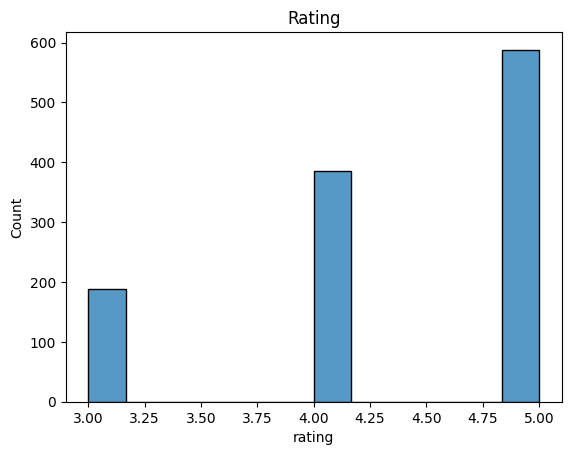

rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64
count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [ ]:
# Plot a histogram of the 'rating' column
# Shows the distribution of customer ratings (e.g., how frequently each rating value appears)
sns.histplot(data=order_data, x='rating')

# Add a title to the histogram for clarity
plt.title('Rating')

# Display the histogram
plt.show()

# Count how many times each unique rating appears in the dataset
rating_count = order_data['rating'].value_counts()

# Generate descriptive statistics for the 'rating' column
# Includes count, mean, standard deviation, min, 25%, 50%, 75%, and max
rating_des = order_data['rating'].describe()

# Print the frequency of each rating value
print(rating_count)

# Print summary statistics for the rating data
print(rating_des)


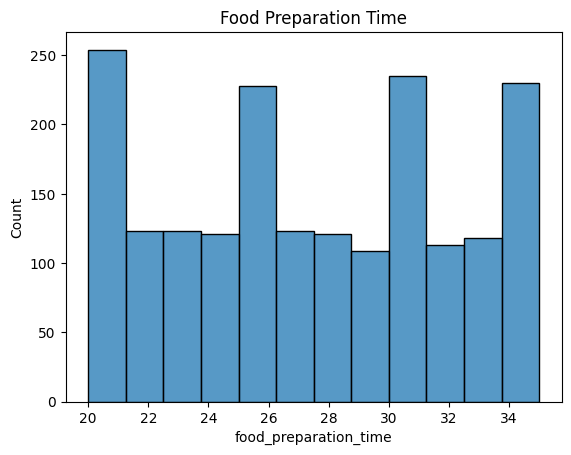

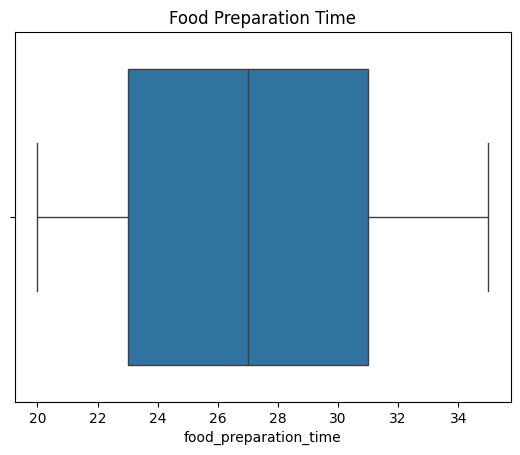

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: count, dtype: int64


In [ ]:
# Plot a histogram to show the distribution of 'food_preparation_time'
# Useful for understanding the frequency of various prep times
sns.histplot(data=order_data, x='food_preparation_time')

# Add a title to the histogram
plt.title('Food Preparation Time')

# Display the plot
plt.show()

# Plot a boxplot to visualize the spread and detect outliers in 'food_preparation_time'
sns.boxplot(data=order_data, x='food_preparation_time')

# Add a title to the boxplot
plt.title('Food Preparation Time')

# Display the plot
plt.show()

# Get descriptive statistics for 'food_preparation_time'
# Includes count, mean, std deviation, min, quartiles, and max
fpt_des = order_data['food_preparation_time'].describe()

# Count how often each unique preparation time occurs
# .sort_index() ensures the counts are listed in ascending order of prep time
fpt_count = order_data['food_preparation_time'].value_counts().sort_index()

# Print the summary statistics
print(fpt_des)

# Print the frequency of each food preparation time
print(fpt_count)


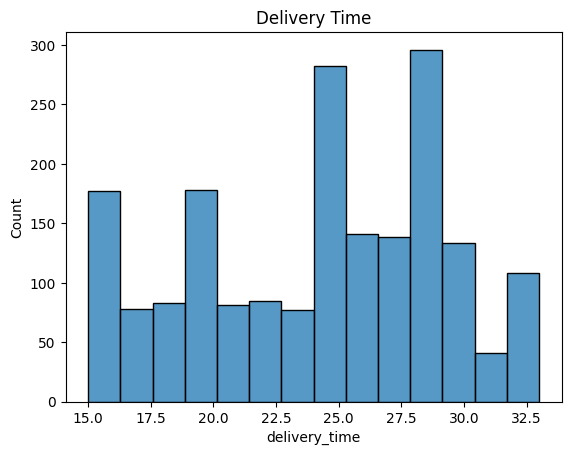

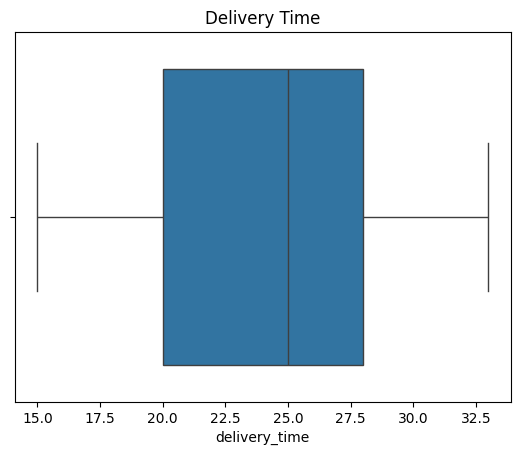

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64
delivery_time
24    162
29    148
28    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64


In [ ]:
# Plot a histogram to show the distribution of 'delivery_time'
# This helps visualize the frequency of different delivery times
sns.histplot(data=order_data, x='delivery_time')

# Add a descriptive title to the histogram
plt.title('Delivery Time')

# Display the histogram
plt.show()

# Plot a boxplot to detect the presence of outliers and examine the spread of delivery times
sns.boxplot(data=order_data, x='delivery_time')

# Add a title to the boxplot
plt.title('Delivery Time')

# Display the boxplot
plt.show()

# Generate summary statistics for 'delivery_time'
# Includes: count, mean, standard deviation, min, 25%, 50% (median), 75%, and max
delivery_time_des = order_data['delivery_time'].describe()

# Count how often each unique delivery time occurs in the dataset
delivery_time_count = order_data['delivery_time'].value_counts()

# Print the summary statistics for delivery time
print(delivery_time_des)

# Print the frequency of each delivery time value
print(delivery_time_count)


####Observations:

1. Cost of Order
  - The highest percentage of order charges are around 14 dollars, accounting   for 8-9% of the order costs.
  - 50% of the data for order charges ranges between 12.00 - 22.00
  - The highest charge is 35.41
  - minimum charge is 4.47
  - The average charge is 16.50
  - The data is right skewed, indicating there is a greater probability of an order being of lower cost within the range of costs.

2. Cuisine Type
 - The top 4 cuisine types, in ascending order, are American, Japanese, Italian, and Chinese. These 4 cuisine types make up 83% of the total orders placed.
 - The number of cuisine type orders coming from these top performers, out of the 1898 orders, are: American:584,
Japanese: 470,
Italian: 298,
Chinese: 215, for a total of 1567 orders.
 - The distribution of the data for cuisine types is largely right skewed owing to the evident favoritism given to the top four preferred cuisine types.

3. Day of the week
 - 71% of the orders placed are placed on the weekend.
 - 29% of the orders placed are placed on the weekdays.
 - 1351 of the 1898 orders are placed on the weekend.
 - 547 of the 1898 orders are placed on the weekday.
 - There is a much greater preference for ordering through food hub on the weekend.

4. Rating
 - The ratings are largely not given.
 - 736 ratings are not given, which totals to 39% of the ratings data. This is alot of missed data on customer satisfaction.
 - 31% of the ratings are exceptional
 - 20% of the ratings are slightly above average
 - The other 10% are average/neutral.
 - It would be good to provide incentive for ratings to gather more data on cuisine types, restaurants, delivery and preparation times.

5. Food Preparation Time
 - The food preparation time is very evenly distributed.
 - There is a minimum time of 20 min. and a max time of 35 min.
 - There is a very minimum deviation of 4 min. from the average preparation time of 27 min.

6. Food Delivery Time
 - There is an average delivery time of 24 min.
 - The average of 50% of the data is very close to the average at 25 min.
 - The data is very evenly distributed.
 - 52% of the deliveries take 24 minutes or longer.
 - The location of drivers or an increase in drivers could help more evenly distribute delivery availability and cut down on the delivery times.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Count how many times each unique restaurant name appears in the dataset
# .value_counts() returns a Series sorted in descending order (most frequent first)
# .head() displays only the top 5 most frequent restaurant names
order_data['restaurant_name'].value_counts().head()


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

The top 5 restaurants from greatest orders to least orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Group the dataset by 'day_of_the_week'
# Then, within each day, count how many times each 'cuisine_type' appears
# This helps identify which types of cuisine are most popular on which days
order_data.groupby('day_of_the_week')['cuisine_type'].value_counts()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:

American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Count the number of orders where the 'cost_of_the_order' is greater than $20
count_above_20 = (order_data['cost_of_the_order'] > 20).sum()

# Get the total number of orders (rows) in the DataFrame
# .shape[0] returns the number of rows
total_orders = order_data.shape[0]

# Calculate the percentage of orders where the cost is above $20
percentage_above_20 = (count_above_20 / total_orders) * 100

# Print the result, formatted to two decimal places
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:

29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean (average) delivery time from the 'delivery_time' column
mean_delivery_time = order_data['delivery_time'].mean()

# Print the result formatted to two decimal places, labeled in minutes
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")


Mean order delivery time: 24.16 minutes


#### Observations:

24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count how many times each unique customer ID appears (i.e., how many orders each customer placed)
# .value_counts() returns counts sorted in descending order
# .head(3) shows the top 3 customers with the most orders
order_data['customer_id'].value_counts().head(3)


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

Customer 52832 placed 13 orders, 47440 placed 10 orders, and 83287 placed 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Calculate the total time for each order by summing the food preparation time and the delivery time
total_time = order_data['food_preparation_time'] + order_data['delivery_time']

# Add the resulting 'total_time' column to the original DataFrame
order_data['total_time'] = total_time

# Display the updated DataFrame to confirm the new column has been added
order_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,cost_group,company_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,30–40,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,10–20,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,10–20,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,20–30,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,10–20,1.7385


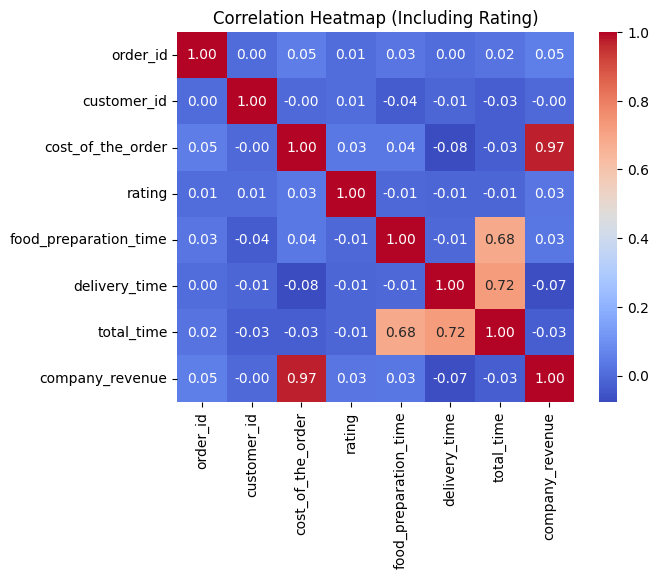

In [ ]:
# Convert the 'rating' column to numeric type (if not already)
# 'errors="coerce"' will replace non-numeric values with NaN (useful for cleaning text or malformed entries)
order_data['rating'] = pd.to_numeric(order_data['rating'], errors='coerce')

# Drop rows where 'rating' is NaN, to ensure clean numeric analysis
cleaned_data = order_data.dropna(subset=['rating'])

# Select only numerical columns from the cleaned dataset
# This ensures the correlation matrix doesn't include non-numeric (e.g., strings or categories) columns
numeric_data = cleaned_data.select_dtypes(include='number')

# Compute the correlation matrix of the numerical columns
# This shows the linear relationship between each pair of numeric variables
corr_matrix = numeric_data.corr()

# Plot a heatmap to visualize the correlation matrix
# 'annot=True' shows the correlation values in each cell
# 'cmap="coolwarm"' gives a blue-red color gradient for high/low values
# 'fmt=".2f"' limits annotations to 2 decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Heatmap (Including Rating)')

# Display the heatmap
plt.show()



total_time
36    4.571429
64    4.533333
41    4.529412
40    4.517241
67    4.500000
38    4.500000
59    4.473684
60    4.444444
37    4.428571
63    4.416667
50    4.415584
49    4.389831
65    4.384615
58    4.380000
62    4.375000
47    4.362069
54    4.346154
42    4.346154
57    4.343750
43    4.342105
48    4.338710
44    4.333333
46    4.301887
51    4.285714
45    4.275862
53    4.272727
56    4.257576
55    4.254237
68    4.250000
52    4.214286
39    4.200000
61    4.178571
35    4.000000
66    4.000000
Name: rating, dtype: float64


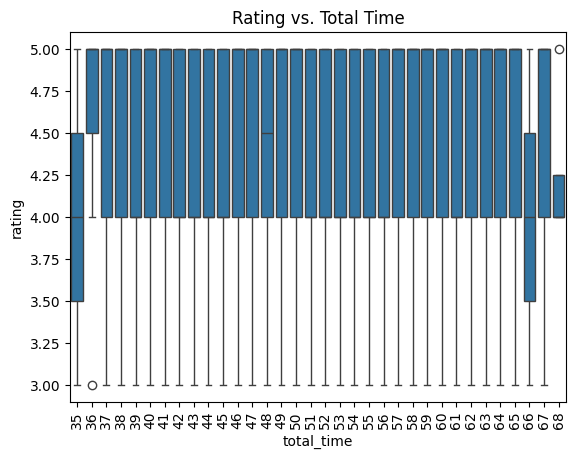

In [ ]:
# Convert the 'rating' column to numeric values
# 'errors="coerce"' converts non-numeric entries like "Not Given" to NaN
order_data['rating'] = pd.to_numeric(order_data['rating'], errors='coerce')

# Filter the DataFrame to exclude any rows where 'rating' was originally 'Not Given'
# (Though this step is technically redundant after using errors='coerce', it's kept here for safety)
filtered_data = order_data[order_data['rating'] != 'Not Given']

# Group the filtered data by 'total_time'
# For each total_time value, calculate the average rating
# Then sort the result in descending order to see which total times get the highest ratings
result = filtered_data.groupby('total_time')['rating'].mean().sort_values(ascending=False)

# Print the grouped and sorted average ratings
print(result)

# Create a boxplot to visualize the distribution of ratings across different total_time values
# Helps identify trends or patterns (e.g., does faster delivery correlate with higher ratings?)
sns.boxplot(data=filtered_data, x='total_time', y='rating')

# Add a title to the plot
plt.title('Rating vs. Total Time')

# Rotate x-axis labels for readability, especially if total_time has many unique values
plt.xticks(rotation=90)

# Display the plot
plt.show()



cost_group
0–10     4.306034
10–20    4.344948
20–30    4.405498
30–40    4.200000
40–50         NaN
50+           NaN
Name: rating, dtype: float64


/tmp/ipython-input-56-214237226.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = order_data.groupby('cost_group')['rating'].mean()


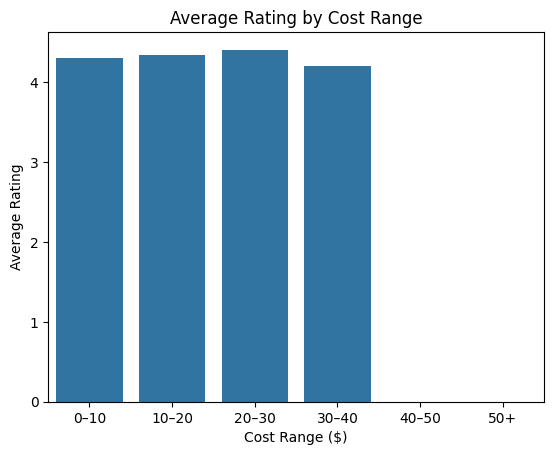

In [ ]:
# Define bins (interval edges) for grouping the cost of the order
# Each bin represents a cost range (e.g., 0–10, 10–20, etc.)
bins = [0, 10, 20, 30, 40, 50, 100]

# Define labels that correspond to each bin above
# These will be used as the category names in the new column
labels = ['0–10', '10–20', '20–30', '30–40', '40–50', '50+']

# Create a new categorical column 'cost_group' in the DataFrame
# Use pd.cut to bucket 'cost_of_the_order' into the defined bins with the given labels
# right=False makes the bins left-inclusive and right-exclusive (e.g., 10 goes into '10–20')
order_data['cost_group'] = pd.cut(order_data['cost_of_the_order'], bins=bins, labels=labels, right=False)

# Group the data by the new 'cost_group' column
# Calculate the average rating for each cost range
grouped = order_data.groupby('cost_group')['rating'].mean()

# Print the grouped average ratings to inspect them
print(grouped)

# Create a barplot to visualize average rating by cost range
# x-axis: cost ranges, y-axis: average rating
sns.barplot(x=grouped.index, y=grouped.values)

# Add a descriptive title and axis labels
plt.title('Average Rating by Cost Range')
plt.xlabel('Cost Range ($)')
plt.ylabel('Average Rating')

# Show the plot
plt.show()




cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


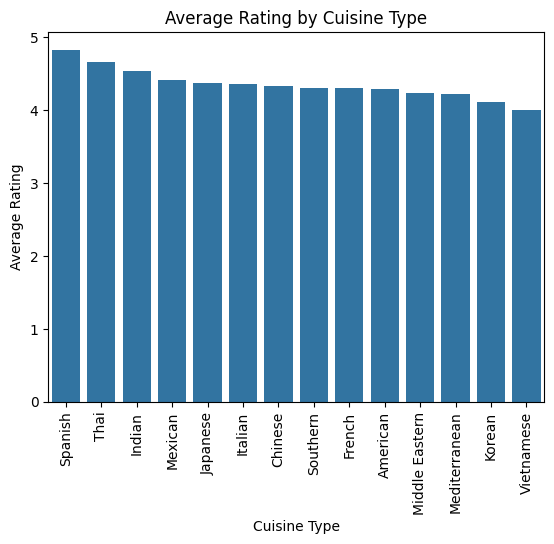

In [ ]:
# Convert the 'rating' column to numeric
# 'errors="coerce"' replaces non-numeric entries like "Not Given" with NaN
order_data['rating'] = pd.to_numeric(order_data['rating'], errors='coerce')

# Filter out any rows where 'rating' was "Not Given"
# Note: This line is technically redundant after coercion, but kept for clarity/safety
filtered_data = order_data[order_data['rating'] != 'Not Given']

# Group the filtered data by 'cuisine_type'
# Calculate the average rating for each cuisine type
# Sort the results in descending order (highest rated cuisines first)
result = filtered_data.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

# Print the result to see the average rating per cuisine type
print(result)

# Create a barplot to visualize average ratings by cuisine type
# x-axis: cuisine types, y-axis: average rating values
sns.barplot(x=result.index, y=result.values)

# Add plot title and axis labels
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')

# Rotate x-axis labels to prevent overlapping if many categories exist
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [ ]:
# Convert the 'rating' column to numeric values
# 'errors="coerce"' replaces non-numeric values like "Not Given" with NaN
order_data['rating'] = pd.to_numeric(order_data['rating'], errors='coerce')

# Filter out any rows where the rating is "Not Given"
# NOTE: Since we coerced to numeric above, "Not Given" becomes NaN
# So this line is technically redundant unless there's still some string value, but included for clarity
filtered_data = order_data[order_data['rating'] != 'Not Given']

# Set pandas display option to show all rows in the output
# Useful when printing a long list of restaurants and their average ratings
pd.set_option('display.max_rows', None)

# Group the filtered data by 'restaurant_name'
# Calculate the average rating for each restaurant
# Sort the restaurants in descending order by their average rating
result = filtered_data.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)

# Print the full sorted list of average ratings by restaurant
print(result)


restaurant_name
'wichcraft                               5.000000
67 Burger                                5.000000
Anjappar Chettinad                       5.000000
Asuka Sushi                              5.000000
Balade                                   5.000000
Cafe de La Esquina                       5.000000
Big Daddy's                              5.000000
Bhatti Indian Grill                      5.000000
Bukhara Grill                            5.000000
Kanoyama                                 5.000000
Olive Garden                             5.000000
Lantern Thai Kitchen                     5.000000
Hot Kitchen                              5.000000
Hunan Manor                              5.000000
Klong                                    5.000000
Dos Caminos Soho                         5.000000
Grand Sichuan International              5.000000
Haru Gramercy Park                       5.000000
El Parador Cafe                          5.000000
Galli Restaurant                  

In [ ]:
# Count how many times each unique restaurant appears in the dataset
# .value_counts() returns a Series sorted in descending order by default
# Useful for identifying the most frequently ordered-from restaurants
order_data['restaurant_name'].value_counts()


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Count how many orders (ratings) each restaurant has received
# This returns a Series indexed by restaurant_name with count values
rating_counts = order_data['restaurant_name'].value_counts()

# Calculate the average rating for each restaurant
# This returns a Series indexed by restaurant_name with average rating values
avg_ratings = order_data.groupby('restaurant_name')['rating'].mean()

# Combine the two Series into a single DataFrame for easier filtering
# Each restaurant will have both rating count and average rating
combined = pd.DataFrame({
    'rating_counts': rating_counts,
    'avg_ratings': avg_ratings
})

# Drop rows with missing values (i.e., restaurants with no average rating due to all NaNs)
combined = combined.dropna()

# Filter to find restaurants that:
# - Have more than 50 ratings (high volume)
# - Have an average rating greater than 4 (high quality)
filtered = combined[(combined['rating_counts'] > 50) & (combined['avg_ratings'] > 4)]

# Display the filtered DataFrame of top-performing restaurants
filtered



,rating_counts,avg_ratings
restaurant_name,,
Blue Ribbon Fried Chicken,96,4.328125
Blue Ribbon Sushi,119,4.219178
Parm,68,4.128205
RedFarm Broadway,59,4.243902
RedFarm Hudson,55,4.176471
Shake Shack,219,4.278195
The Meatball Shop,132,4.511905


#### Observations:

The promptional offer should go to: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, RedFarm Broadway, RedFarm Hudson, Shake Shack, and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Convert the 'cost_of_the_order' column to numeric values
# Any non-numeric entries are coerced to NaN
order_data['cost_of_the_order'] = pd.to_numeric(order_data['cost_of_the_order'], errors='coerce')

# Remove rows where 'cost_of_the_order' is missing (NaN)
# Necessary to ensure accurate revenue calculations
order_data = order_data.dropna(subset=['cost_of_the_order'])

# Initialize a new column 'company_revenue' with zeros
# This column will store revenue earned from each order
order_data['company_revenue'] = 0

# For orders costing more than $20, the company earns 25% of the order value
# Apply this rule using .loc to modify only the matching rows
order_data.loc[order_data['cost_of_the_order'] > 20, 'company_revenue'] = \
    order_data['cost_of_the_order'] * 0.25

# Define a condition for orders between $5 and $20 (inclusive of >5, ≤20)
condition = (order_data['cost_of_the_order'] > 5) & (order_data['cost_of_the_order'] <= 20)

# Apply the 15% revenue rule to orders that match the condition
order_data.loc[condition, 'company_revenue'] = \
    order_data['cost_of_the_order'] * 0.15

# Calculate the total revenue earned by summing the 'company_revenue' column
net_revenue = order_data['company_revenue'].sum()

# Print the final total revenue, formatted to two decimal places
print(f"Net revenue generated by the company: ${net_revenue:.2f}")


Net revenue generated by the company: $6166.30


/tmp/ipython-input-61-3668048770.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.6875 7.3    6.305  6.075  8.2575 6.05   7.275  7.275  5.47   7.8325
 7.2625 7.275  6.075  7.4575 8.305  6.0625 5.6875 7.2625 5.47   7.3475
 5.0575 7.275  5.6875 6.0625 8.2575 7.845  8.2575 6.05   8.2325 7.2625
 7.3225 5.6875 5.3    6.3175 8.2575 6.05   5.4575 7.8225 6.075  5.565
 5.1175 5.59   5.4575 7.2875 5.59   7.8225 6.075  6.3175 7.2625 7.3
 8.2325 6.05   7.335  6.0625 7.3    5.7    8.2575 7.2625 7.8325 8.2575
 5.59   5.7    5.045  5.565  7.2875 6.305  7.2875 7.8575 8.2575 7.3375
 7.2875 6.0625 8.2575 7.8575 7.3125 8.245  7.2875 6.05   7.3    7.275
 6.05   5.565  5.4825 5.7125 5.7    6.075  7.2875 6.075  7.275  5.3475
 6.0625 8.2325 7.275  5.335  5.045  7.3125 6.305  6.05   5.4825 6.05
 8.2325 6.05   6.305  5.6875 6.075  8.2575 6.0625 5.4575 7.2875 5.565
 7.275  5.59   6.075  6.0625 5.045  7.2875 5.4825 8.2325 7

#### Observations:

$6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Access the 'total_time' column that was previously created (preparation time + delivery time)
# This line is redundant if no operation is performed, but may act as a check or step in interactive exploration
order_data['total_time']

# Filter the dataset to include only orders where the total time exceeds 60 minutes
# This helps identify potentially slow deliveries
filtered_data = order_data[order_data['total_time'] > 60]

# Calculate the percentage of orders that took more than 60 minutes
# len(filtered_data): number of slow orders
# len(order_data): total number of orders
percentage_over_60 = (len(filtered_data) / len(order_data)) * 100

# Print the result, formatted to two decimal places
print(f"Percentage of orders taking more than 60 minutes to get delivered: {percentage_over_60:.2f}%")


Percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### Observations:

10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Group the dataset by 'day_of_the_week'
# For each day, calculate the average (mean) delivery time
# This helps identify which days have faster or slower delivery performance
order_data.groupby('day_of_the_week')['delivery_time'].mean()




,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

Deliveries on weekdays take and average of 28.34 min.

Delievries on weekends take an average of 22.47 min.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are no significant correlations between the differing numerical data types.
* Certain cuisine types tend to get higher ratings in a linear fashion.
* Other data show no distinct correlations or notable differences when compared to rating.
* Certain restaurants get much higher traffic than others as displayed above.
* Weekdays take an average of 6 minutes longer to deliver than on the weekends.
* 11% of the orders take longer than 60 minutes from the time the order is placed to delivery.

### Recommendations:

*  Continue the promotional offer to restaurants receiving more than 50 ratings and a higher than 4 average rating.
* Consider placing more delivery personell in higher order volume areas to ensure quicker pickup and delivery times.
* Consider increasing the number of delivery personell on the weekdays, especially in high restaurant order volume areas.
* Consider a promotional offer for restaurants that have a food preparation time of less than 15 minutes. This will also help cut down on the total time from order to delivery.
* The company revenue is influenced by the percentage of the total cost of the order FoodHub delivers. Look at the rates you charge and consider increasing them to a blanket 25% on all orders regardless of price.
* Consider partnerships, greater assurance, or priority with the restaurants that have high volume and high ratings. For example, a devoted priority for assigning delivery drivers to these restaurants or having drivers dedicated to only those restaurants.
* Consider the other suggestions under the univaraiate analysis observations.

---